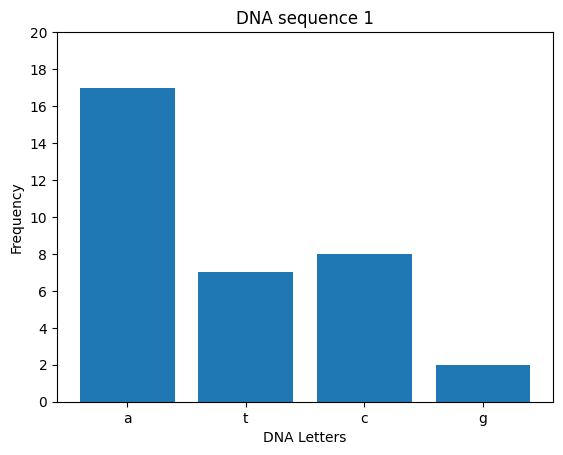

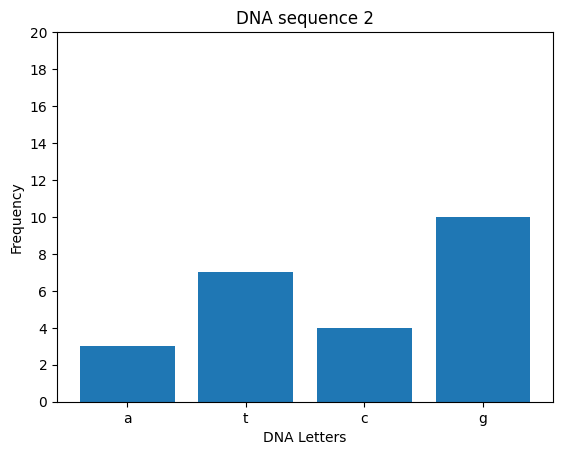

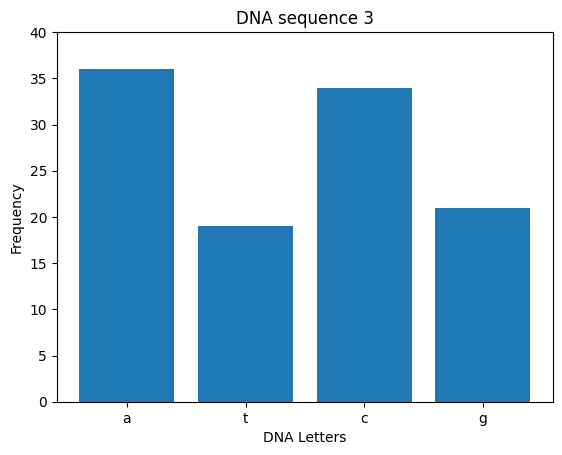

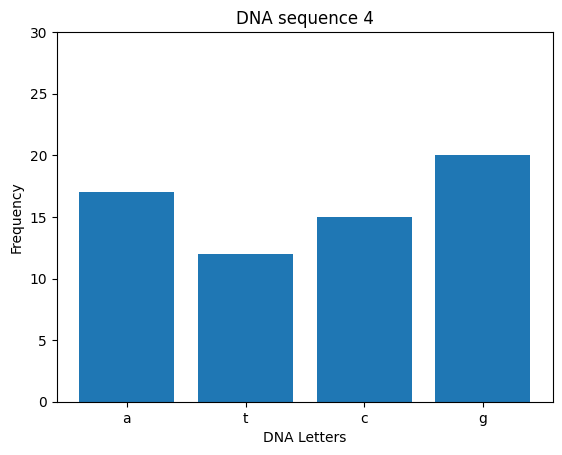

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# function to read file, format text into lower, count letters and add them to dictionary and finaly adding dictionary into a list. 
def sort_dna(filepath):
    sequence_dict = {}
    sequence_nr = 1
    sequence_list = []
    with open(filepath, "r") as f_read:
        for dna_sequence in f_read:
            dna_sequence
            if dna_sequence[0] == ">":
                sequence_list.append(sequence_dict)
                sequence_dict = {
                    "Name": f"DNA sequence {sequence_nr}",
                    "a": 0,
                    "t": 0,
                    "c": 0,
                    "g": 0,
                }
                sequence_nr += 1
            else:
                dna_sequence = dna_sequence.lower()
                sequence_dict["a"] += dna_sequence.count("a")
                sequence_dict["t"] += dna_sequence.count("t")
                sequence_dict["c"] += dna_sequence.count("c")
                sequence_dict["g"] += dna_sequence.count("g")
    
    sequence_list.append(sequence_dict)
    sequence_list.pop(0)

    return sequence_list

# Input interface to ask the user if they want to run Task 1 och Task 2 and return correct datapath.
DNA_task = input("Run Task 1 och Task 2? (1 / 2)")
choice = 0

while choice == 0:
    if DNA_task == "1":
        data_path = "data/dna_raw.txt"
        choice = 1                        
    elif DNA_task == "2":
        data_path = "data/dna_raw_complicated.txt"
        choice = 1                    
    else:
        DNA_task = input("Choose 1 or 2? (1 / 2)")

# Looping though the list and making a bar chart of every sequence.
dna_data = sort_dna(data_path)

for i in dna_data:
    fig, ax = plt.subplots()
    dna_name = list(i.keys())[1:]
    dna_value = list(i.values())[1:]
    sequence_name = (i["Name"])
    if max(dna_value) < 20:
        dna_ylimit = 20
        dna_yscale = 2
    elif max(dna_value) < 30:
        dna_ylimit = 30
        dna_yscale = 5
    else:
        dna_ylimit = 40
        dna_yscale = 5


    ax.bar(dna_name, dna_value)

    ax.set(xlabel="DNA Letters",ylabel="Frequency",ylim=(0,dna_ylimit),title=sequence_name)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(dna_yscale))

    plt.show()


    



